In [34]:
from lib.analysis import *
import numpy as np

class Averaging():
    def __init__(self):
        self.x_values = []
        self.y_values = []
        self.min_x_key = None
        self.max_x_key = None
        self.random_gap = False
        self.dont_combine = False

    def average(self, packages: list[RecordStepsPackage], precision=1000):
        positions = dict()

        for i, pack in enumerate(packages):
            # if not (name in pack.name): continue
            print(pack.name)
            for step in pack.steps:
                if self.dont_combine:
                    key = str(step.pos)
                    positions[key] = [step.digital]
                else:
                    if not key in positions:
                        positions[key] = []
                    key = str(round(step.pos * precision) / precision)
                    positions[key].append(step.digital)


        for key in positions:
            positions[key] = np.average(positions[key])

        x_values = self.x_values
        y_values = self.y_values
        keys = sorted(positions.keys(), key=lambda x: float(x))
        print(keys)

        prev_pos = 0
        for key in keys:
            pos = float(key)
            value = positions[key]

            if self.min_x_key is None and value < 1:
                self.min_x_key = prev_pos

            prev_pos = pos

        prev_pos = 0
        for key in reversed(keys):
            pos = float(key)
            value = positions[key]
            
            if self.max_x_key is None and value > 0:
                self.max_x_key = prev_pos

            prev_pos = pos

        for key in reversed(keys):
            pos = float(key)
            x_values.append(pos)

            if pos > self.min_x_key and pos < self.max_x_key and self.random_gap:
                y_values.append(np.random.randint(0, 2))
            else:
                value = positions[key]
                y_values.append(value)

        gap_poses = []
        gap_weights = []


In [ ]:
from lib.analysis import *
import matplotlib
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# name = "pribl"

def draw_graph(packs, name):
    averaging = Averaging()
    averaging.dont_combine = True
    averaging.average(packs, 1000000)

    fig, ax1 = plt.subplots()
    ax: Axes = ax1

    ax.step(averaging.x_values, averaging.y_values, label="цифровое значение", where="post")
    ax.axvline(0, color='red', alpha=0, linestyle='-', linewidth=1.5, label=f'min : {averaging.min_x_key:.3f}')
    ax.axvline(0, color='red', alpha=0, linestyle='-', linewidth=1.5, label=f'max : {averaging.max_x_key:.3f}')

    dist = averaging.max_x_key - averaging.min_x_key
    limit_dist_factor = 0.5
    ax1.set_xlim([averaging.min_x_key - dist*limit_dist_factor, averaging.max_x_key + dist*limit_dist_factor])

    space = round(abs(dist) * 100) / 100
    space = space * 0.4

    ax.xaxis.set_major_locator(ticker.MultipleLocator(space))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(space / 4))

    # Показываем график
    fig.tight_layout(pad=2)
    fig.set_figheight(1)
    plt.title(name)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
            ncol=3, fancybox=True, shadow=True)
    save_file = reader.dir / "digital_graphs"
    save_file.mkdir(exist_ok=True)
    save_file = save_file/f"{name}.png"
    plt.savefig(save_file, bbox_inches='tight')


for i in range(4):
    key = str(i+1)
    reader = MultiReader(Path(f"./measurements/{key}stMagnet/"))
    packages = reader.parse()

    first_positive_digital_steps = []

    for pack in packages:
        draw_graph([pack], pack.name)

# Гистограмма

4_10_S_10mm 19.438
4_11_S_10mm 19.425
4_14_S_10mm 19.408
4_15_S_10mm 19.39
4_16_S_10mm 19.361
4_17_S_10mm 19.326
4_18_S_10mm 19.345
4_1_S_10mm 19.503
4_20_S_10mm 19.407
4_21_S_10mm 19.392
4_22_S_10mm 19.343
4_24_S_10mm 19.313
4_25_S_10mm 19.265
4_27_S_10mm 19.263
4_28_S_10mm 19.325
4_29_S_10mm 19.377
4_2_S_10mm 19.504
4_3_S_10mm 19.47
4_4_S_10mm 19.47
4_5_S_10mm 19.486
4_6_S_10mm 19.55
4_7_S_10mm 19.535
4_9_S_10mm 19.487
19.25 [19.265, 19.263]
19.3 [19.313]
19.35 [19.361, 19.326, 19.345, 19.343, 19.325]
19.4 [19.408, 19.39, 19.407, 19.392, 19.377]
19.45 [19.438, 19.425, 19.47, 19.47]
19.5 [19.503, 19.504, 19.486, 19.487]
19.55 [19.55, 19.535]
19.6 []
8


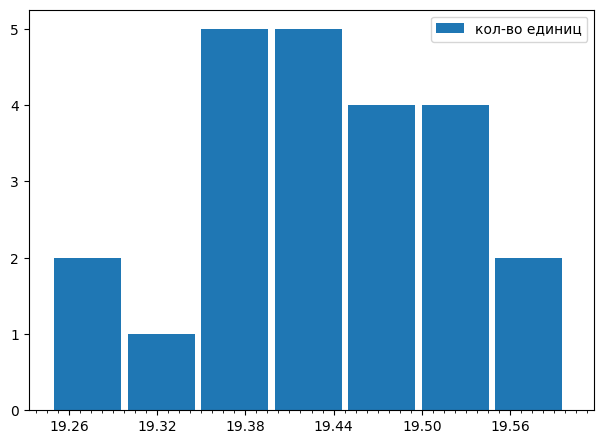

In [64]:
from lib.analysis import *
import matplotlib
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from lib.analysis import *

reader = MultiReader(Path("./measurements/4stMagnet_Izm_10mm/"))
packages = reader.parse()

first_positive_digital_steps = []

for pack in packages:
    for step in pack.steps:
        if step.digital == 1:
            first_positive_digital_steps.append(step)
            print(pack.name, step.pos)
            break

precision = 20

positions = dict()
for step in first_positive_digital_steps:
    key = str(np.ceil((step.pos - 0.02) * precision) / precision)
    if not key in positions:
        positions[key] = []
    positions[key].append(step.pos)

keys = sorted(positions.keys(), key=lambda x: float(x))

for new_key in np.arange(float(keys[0]), float(keys[-1]), 1 / precision):
    new_key = str(np.ceil(new_key * precision) / precision)
    if not new_key in positions:
        positions[new_key] = []

keys = sorted(positions.keys(), key=lambda x: float(x))

fig, ax1 = plt.subplots()
ax: Axes = ax1

space = (0.3 / precision)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(space * 4))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(space / 2))

counts = []
bins = []
for key in keys:
    print(key, positions[key])
    counts.append(len(positions[key]))
    bins.append(float(key))

print(len(positions))

ax.hist(bins, bins, weights=counts, label="кол-во единиц", width= (1 / precision / 1.1))

fig.tight_layout(pad=2)

plt.legend()
save_file = reader.dir / "digital_graphs"
save_file.mkdir(exist_ok=True)
save_file = save_file/f"{reader.dir.stem}.png"
plt.savefig(save_file, bbox_inches='tight')